<Figure size 864x432 with 0 Axes>

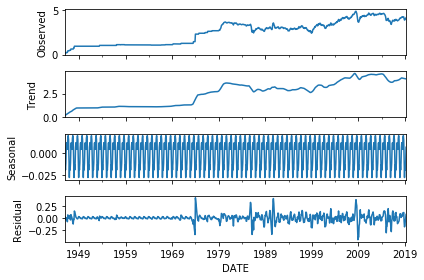

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller


#Update the filepath wrt to yout data folder
filepath = 'WTISPLC.csv'



df = pd.read_csv(filepath, parse_dates=['DATE'])


df.set_index('DATE',  inplace=True)

df['WTI_log']= (np.log(df.WTISPLC))
df['WTI_logDiff']= (df.WTI_log).diff()


f=plt.figure(figsize=(12,6))
_=smt.seasonal_decompose(df.WTI_log,extrapolate_trend=1).plot()




ADF Statistic: -13.031550
p-value: 0.000000
ADF Statistic: -1.514369
p-value: 0.526392


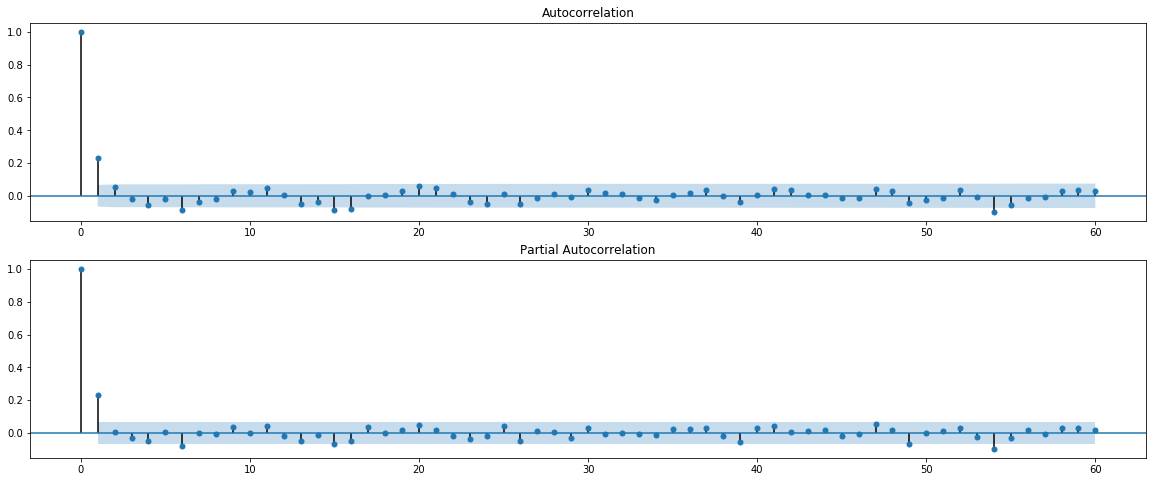

In [5]:

# logarithm of time series differentiated once 
i1_sdiff = df.WTI_log.diff().dropna()

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = smt.graphics.plot_acf(i1_sdiff, lags=60, ax=ax1)
ax2 = fig.add_subplot(212)
fig = smt.graphics.plot_pacf(i1_sdiff, lags=60, ax=ax2)


#ADF test of log series differences
result = adfuller(i1_sdiff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


#ADF test of the original series
result = adfuller(df.WTISPLC.dropna())
print('ADF Statistic: %f' % result[0])


print('p-value: %f' % result[1])

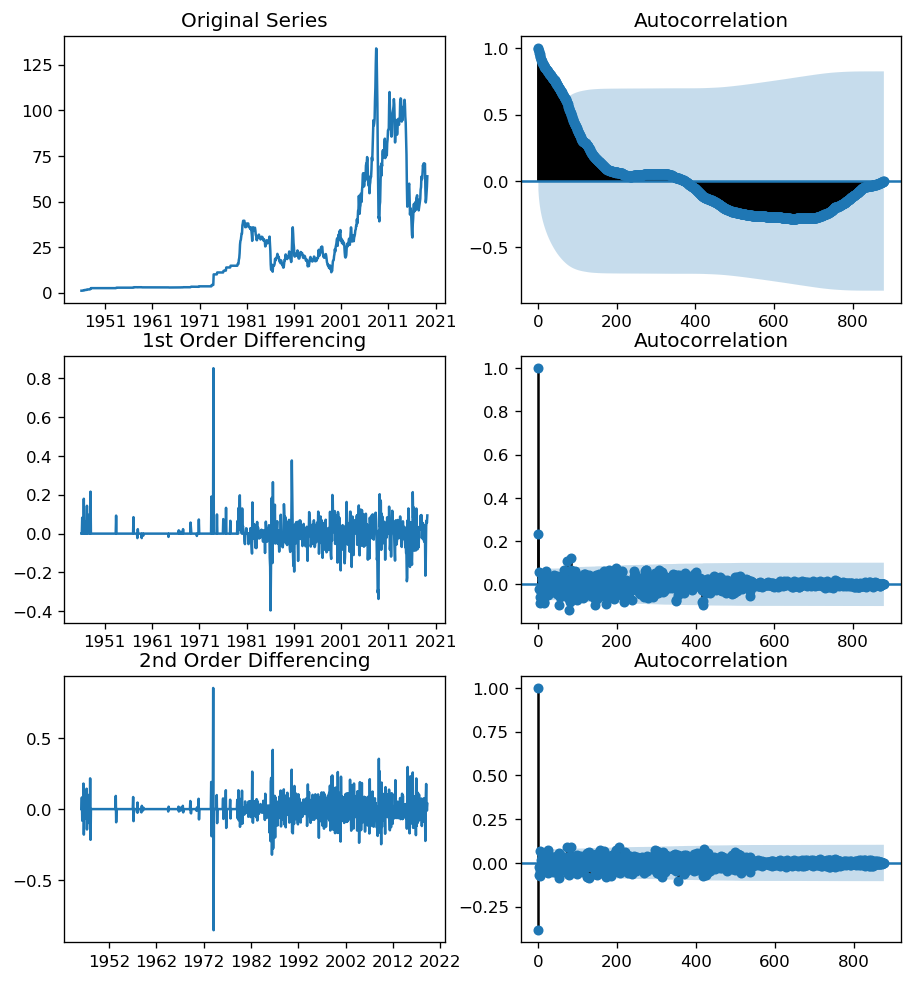

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,10), 'figure.dpi':120})


# Original Series

fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(df.WTISPLC); axes[0, 0].set_title('Original Series')
plot_acf(df.WTISPLC.dropna(),ax=axes[0, 1])
#ax=axes[0, 1]
# 1st Differencing
axes[1, 0].plot(i1_sdiff); axes[1, 0].set_title('1st Order Differencing')
plot_acf(i1_sdiff.dropna(), ax=axes[1, 1] )

# 2nd Differencing
axes[2, 0].plot(i1_sdiff.diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(i1_sdiff.diff().dropna(), ax=axes[2, 1])

plt.show()

C:\Users\Z620\Anaconda3\envs\IBAlgoTrading\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


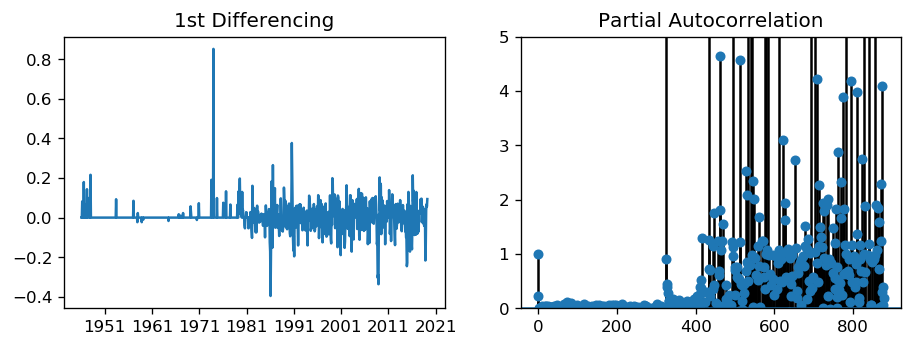

In [7]:

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df.WTI_log.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.WTI_log.diff().dropna(), ax=axes[1])

plt.show()

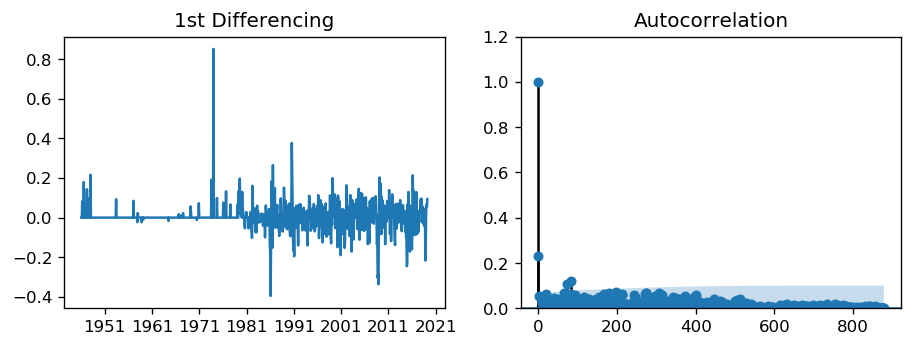

In [8]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df.WTI_log.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.WTI_log.diff().dropna(), ax=axes[1])

plt.show()

In [9]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.WTI_log, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.WTI_log   No. Observations:                  879
Model:                 ARIMA(1, 1, 0)   Log Likelihood                1124.729
Method:                       css-mle   S.D. of innovations              0.067
Date:                Thu, 27 Jun 2019   AIC                          -2243.459
Time:                        09:44:42   BIC                          -2229.123
Sample:                    02-01-1946   HQIC                         -2237.976
                         - 04-01-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0046      0.003      1.548      0.122      -0.001       0.010
ar.L1.D.WTI_log     0.2331      0.033      7.105      0.000       0.169       0.297
                                

C:\Users\Z620\Anaconda3\envs\IBAlgoTrading\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Z620\Anaconda3\envs\IBAlgoTrading\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\Z620\Anaconda3\envs\IBAlgoTrading\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<Figure size 1440x960 with 0 Axes>

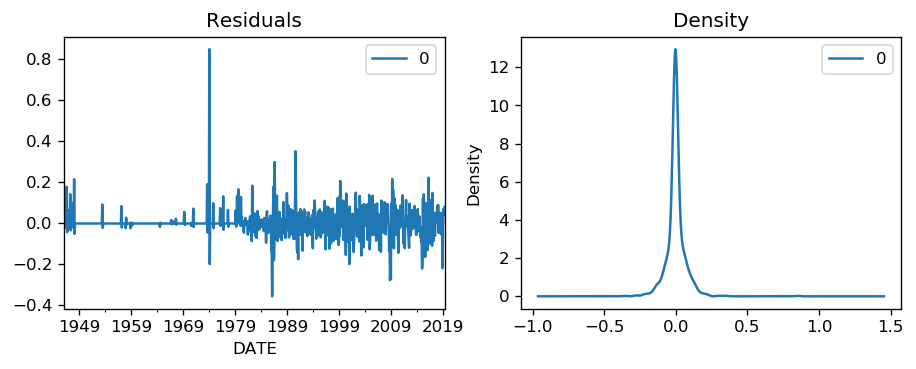

In [10]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)

#plt.rcParams.update({'figure.figsize':(9,10), 'figure.dpi':120})


fig = plt.figure(figsize=(12,8))
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

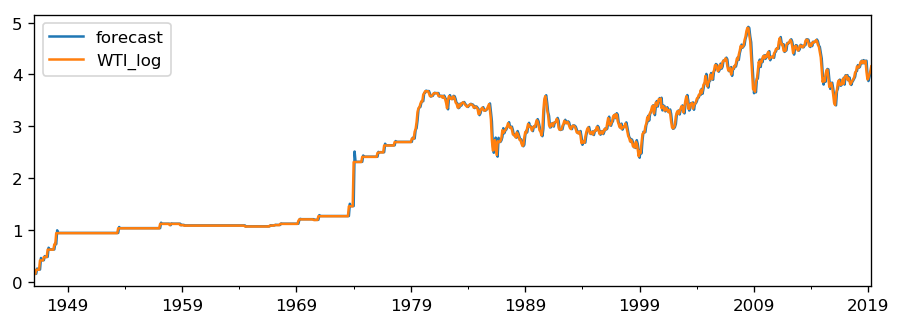

In [11]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

C:\Users\Z620\Anaconda3\envs\IBAlgoTrading\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Z620\Anaconda3\envs\IBAlgoTrading\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.WTISPLC   No. Observations:                  838
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1986.268
Method:                       css-mle   S.D. of innovations              2.589
Date:                Thu, 27 Jun 2019   AIC                           3984.535
Time:                        09:44:44   BIC                           4012.921
Sample:                    02-01-1946   HQIC                          3995.416
                         - 11-01-2015                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0623      0.079      0.792      0.429      -0.092       0.217
ar.L1.D.WTISPLC     1.2384      0.058     21.251      0.000       1.124       1.353
ar.L2.D.WTISPLC    -0.2416      

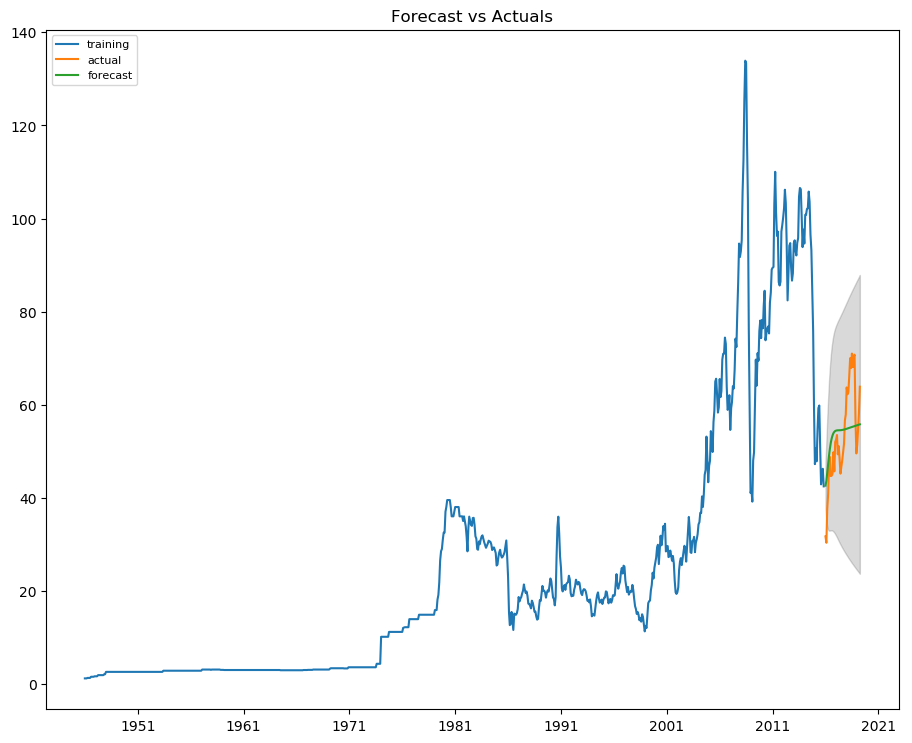

In [12]:
# Create Training and Test
train = df.WTISPLC[:839]
test = df.WTISPLC[840:]


# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(3,1,1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(40, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(11,9), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [13]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm



model = pm.auto_arima(df.WTISPLC, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True
                      #,out_of_sample_size=40
                     )

print(model.summary())

#> Fit ARIMA: order=(1, 2, 1); AIC=525.586, BIC=535.926, Fit time=0.060 seconds
#> Fit ARIMA: order=(0, 2, 0); AIC=533.474, BIC=538.644, Fit time=0.005 seconds
#> Fit ARIMA: order=(1, 2, 0); AIC=532.437, BIC=540.192, Fit time=0.035 seconds
#> Fit ARIMA: order=(0, 2, 1); AIC=525.893, BIC=533.648, Fit time=0.040 seconds
#> Fit ARIMA: order=(2, 2, 1); AIC=515.248, BIC=528.173, Fit time=0.105 seconds
#> Fit ARIMA: order=(2, 2, 0); AIC=513.459, BIC=523.798, Fit time=0.063 seconds
#> Fit ARIMA: order=(3, 2, 1); AIC=512.552, BIC=528.062, Fit time=0.272 seconds
#> Fit ARIMA: order=(3, 2, 0); AIC=515.284, BIC=528.209, Fit time=0.042 seconds
#> Fit ARIMA: order=(3, 2, 2); AIC=514.514, BIC=532.609, Fit time=0.234 seconds
#> Total fit time: 0.865 seconds
#>                              ARIMA Model Results                              
#> ==============================================================================
#> Dep. Variable:                   D2.y   No. Observations:                   98
#> Model:                 ARIMA(3, 2, 1)   Log Likelihood                -250.276
#> Method:                       css-mle   S.D. of innovations              3.069
#> Date:                Sat, 09 Feb 2019   AIC                            512.552
#> Time:                        12:57:22   BIC                            528.062
#> Sample:                             2   HQIC                           518.825
#> 
#> ==============================================================================
#>                  coef    std err          z      P>|z|      [0.025      0.975]
#> ------------------------------------------------------------------------------
#> const          0.0234      0.058      0.404      0.687      -0.090       0.137
#> ar.L1.D2.y     1.1586      0.097     11.965      0.000       0.969       1.348
#> ar.L2.D2.y    -0.6640      0.136     -4.890      0.000      -0.930      -0.398
#> ar.L3.D2.y     0.3453      0.096      3.588      0.001       0.157       0.534
#> ma.L1.D2.y    -1.0000      0.028    -36.302      0.000      -1.054      -0.946
#>                                     Roots                                    
#> =============================================================================
#>                   Real          Imaginary           Modulus         Frequency
#> -----------------------------------------------------------------------------
#> AR.1            1.1703           -0.0000j            1.1703           -0.0000
#> AR.2            0.3763           -1.5274j            1.5731           -0.2116
#> AR.3            0.3763           +1.5274j            1.5731            0.2116
#> MA.1            1.0000           +0.0000j            1.0000            0.0000
#> -----------------------------------------------------------------------------

ModuleNotFoundError: No module named 'pmdarima'

In [17]:
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter

kf = KalmanFilter(1,1)

kf.obs_cov = np.array([.5]) # H
kf.state_cov = np.array([1.0])  # Q
kf.design = np.array([1.0])  # Z
kf.transition = np.array([1.0])  # T
kf.selection = np.array([1.0])  # R

obs_matrix = (df.WTISPLC).values.copy()

# Initialize known state
kf.initialize_known(np.array(obs_matrix[0:1]), np.array([[1.0]]))
# Bind data

 

print (obs_matrix[0:1])
kf.bind(obs_matrix.copy())
r = kf.filter()




[ 1.17]


880

WTISPLC           float64
WTI_log           float64
WTI_logDiff       float64
filtered_state    float64
dtype: object


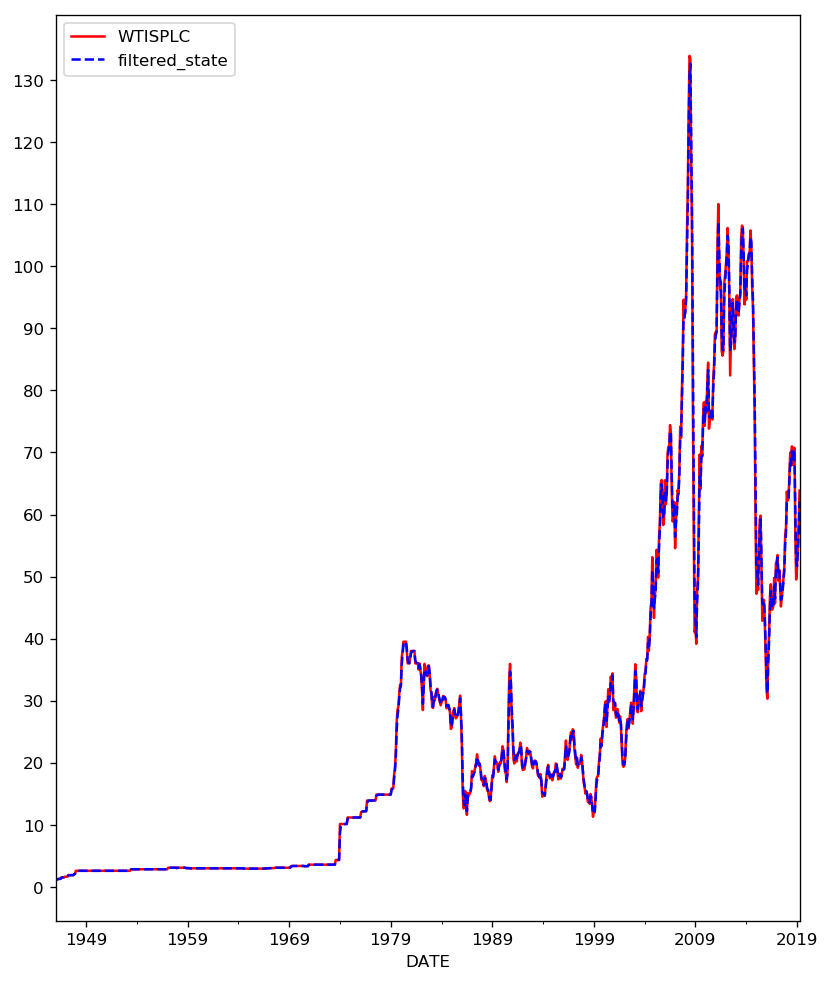

In [21]:
a=len(obs_matrix)

#kfilter = np.array (r.filtered_state[0][1:880])
kfilter1 = np.array (r.filtered_state[0][0:a])

#df['filtered_state'] = r.filtered_state[0][1:879])
df['filtered_state'] = kfilter1

print(df.dtypes)

df[['WTISPLC','filtered_state']].plot(figsize=(8,10), style=['r-', 'b--',],yticks =np.arange(0, 140,10))
#ax.xaxis.set_ticks(np.arange(start, end, stepsize))